<a href="https://colab.research.google.com/github/JHaddyJ/ML/blob/main/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description
Task: Develop diverse machine learning models tailored to the provided dataset. The dataset comprises three distincct documents spanning from Spring 2014 to Fall 2023, each containing 9 or 10 individual sheets representing each year. Within these sheets, data is provided for multiple 4 + 1 programs operational during the semester, along with grade distributions across various programs.

**Data Inspection**

> We are provided with 3 files: Fall 2014-2023.xlsx & Spring 2014-2024.xlsx & Summer 2014-2023.xlsx. Each of these files contains sheets for each year specified in the file year name.

> The sheets consist of the grade distributions (A, A-, B, B-, B+, C, C-, C+, D, D+, F, F*, I, MP, NP, P W), 'blank' and 'Grand Total' as the columns.

> 'GRAD' and 'UGRAD' are the row labels, representing the Graduate level programs and the Undergraduate level programs of the year/sheet.


Note:

> From the inspection of the files, the values of the columns are numerical and each column for the specified grades consist of the count of grades produced by each program during the provided year/sheet.

> There are no target variables or features: we are provided the grade counts accross the 4+ 1 programs active during that year.


* Given that we are have limited information abiut the data: we are given grade distributions across the 4+1 programs active for the specified years and semesters.

* We will further research the grade distribution of Salem State University to understand the columns of the datasets. This is important because we are provided with no additonal details about the data and the column labels are not descriptive. Thus, further investiagtion of the university's grading policy will help us define what each grade represents.

Research Results: SSU Grading Information

> A : Insightful scholarship, valid research, creativity, original application, and genuine promise of continuing growth in the field of study.

> A- : Solid Scholarship, sound research, creative application, and promise of growth in the field of study.

> B+ : Acceptable scholarship and research, valid application, and probable promise of growth in the field of study.

> B : Adequate scholarship, research, relevant application, and possible promise for growth in the field of study.

> B- : Marginal scholarship, research  and application suggesting minimal prospects for growth in the field of study.

> C+ : Inadequate scholarship, research and application suggesting minimal prospect for growth in the field of study.

> C : Inadequate scholarship, research and application requiring improvement in future performance.

> C- : Inadequate scholaeship, researcg and application requiring major improvement in future performance.

> F : Unacceptable graduate work

> MP : Deficient in some way in a pass/fail course but not to the point of failure.

> NP: Student earns no credit and it is not reflected in the student's GPA.

> P: The student earns a credit for the course and it is not reflected on the student's GPA, it is the equivalent of an A/ A- grade and indicates a strong performance of the student in the course.

> I: "Incomplete" is a temporary grade assigned to students who have not completed coursework and who have made provisions to do so with the course instructor before the assignment of the final grades of the course.

> F* : A case where a student ceases to fulfill the requirements of the course and yet does not withdraw according to the procedure outlined.

> W : If a student withdraws from a corse after the Add/Drop period ends and before the withdrawal deadline as published in the academic calendar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Library
import pandas as pd

* The years provided by the data range from 2014 - 2024: a demarcation we can use for the data is the Covid-19 pandemic. Moreover, the pandemic marked a huge shift in education and learning styles.

> So we will use the pandemic to help organize the data. Additonally, because the Covid-19 pandemic has introduced a continuous shift in education with the introduction of online learning, more use of technology for resources and information, etc. Thus, for the benefit of the times, we will work with data that invloves Post Covid-19 pandemic information to solve issues relevenat to the current times.

> Post Covid-19 = semesters > March 2020. We will use data from the sheets that are within this range.

* We will conduct additional research to learn about the SSU 4+1 programs.

> Research Information:

> * Graduate courses are offered in the late afternoons and evenings throughout the academic year and in the summer: So, we will use data from all three semesters/files provided.

> * Undergraduate students can apply for the 4+1 programs in their sophomore/Junior year to enter the graduate programs in their Junior/Senior year.

* We will prepare the data by creating Excel files for Undergraduate programs and another file for Graduate programs using information from the post-COVID-19 semesters.


**Import Prepared Files**

In [ ]:
# Read .xlsx files
#Load the Dataset
ugradPostCovid = pd.read_excel('/content/drive/MyDrive/CSC340/UgrdPostCovid.xlsx')
gradPostCovid = pd.read_excel('/content/drive/MyDrive/CSC340/GradPostCovid.xlsx')


# Write to .csv files
ugradPostCovid.to_csv('Ugrad.csv', index=False)
gradPostCovid.to_csv('Grad.csv', index=False)


# Read .csv files
Ugrad = pd.read_csv('Ugrad.csv')
Grad = pd.read_csv('Grad.csv')


# Exploratory Data Analysis

**Post Covid-19 Semesters: Undegraduate**

In [ ]:
#Dimensions of the datatset
Ugrad.shape

(183, 21)

> The dataset contains 183 rows and 21 columns.

In [ ]:
#Data types per attribute
Ugrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UGRD         183 non-null    object 
 1   A            183 non-null    int64  
 2   A-           181 non-null    float64
 3   B            171 non-null    float64
 4   B-           151 non-null    float64
 5   B+           176 non-null    float64
 6   C            134 non-null    float64
 7   C-           112 non-null    float64
 8   C+           156 non-null    float64
 9   D            75 non-null     float64
 10  D-           50 non-null     float64
 11  D+           50 non-null     float64
 12  F            80 non-null     float64
 13  F*           81 non-null     float64
 14  I            46 non-null     float64
 15  MP           39 non-null     float64
 16  NP           61 non-null     float64
 17  P            158 non-null    float64
 18  W            128 non-null    float64
 19  (blank) 

> The 'UGRD' column is of type object, which specifies the programs offered during the post-COVID-19 semesters. All the columns with the grade counts are of type: float while 'A' counts are integer values. '(blank)' and 'Grand Total' are also integer type variables.

In [ ]:
#View the first 5 rows of the dataset
Ugrad.head()

,UGRD,A,A-,B,B-,B+,C,C-,C+,D,...,D+,F,F*,I,MP,NP,P,W,(blank),Grand Total
0,ACCGU-BSBA,284,75.0,38.0,21.0,58.0,13.0,2.0,3.0,1.0,...,NaN,2.0,1.0,NaN,NaN,3.0,28.0,14.0,209,752
1,BIOGU-BS,82,25.0,14.0,5.0,10.0,1.0,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.0,115,272
2,CARTGU-BS,80,29.0,8.0,4.0,18.0,1.0,1.0,2.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,4.0,57,207
3,CRIMJGU-BS,175,32.0,17.0,4.0,16.0,1.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,106,360
4,EDEEGU-BS,762,225.0,109.0,51.0,135.0,15.0,17.0,27.0,7.0,...,5.0,6.0,11.0,NaN,1.0,8.0,175.0,31.0,586,2173


> From the tabular view of the dataset, we can see that there are missing/ NaN values in the dataset.

> We will further inspect the dataset for the missing values inorder to have a fully populated datatset.

In [ ]:
#Check for columns with 'NaN' values
na_count = Ugrad.isna().sum()
print(na_count)

UGRD             0
A                0
A-               2
B               12
B-              32
B+               7
C               49
C-              71
C+              27
D              108
D-             133
D+             133
F              103
F*             102
I              137
MP             144
NP             122
P               25
W               55
(blank)          0
Grand Total      0
dtype: int64


> The columns with the data type: float, have existing missing/NaN values - these are the columns of the grade counts.

> We will replace the missing/ Nan values with 0 since they are all numerical values -  we will do this with the assumption that the lack of value in those entries means a grade count of 0.

In [ ]:
#Replcae the 'NaN' values with 0
Ugrad_Update = Ugrad.fillna(0)
Ugrad_Update.head()

,UGRD,A,A-,B,B-,B+,C,C-,C+,D,...,D+,F,F*,I,MP,NP,P,W,(blank),Grand Total
0,ACCGU-BSBA,284,75.0,38.0,21.0,58.0,13.0,2.0,3.0,1.0,...,0.0,2.0,1.0,0.0,0.0,3.0,28.0,14.0,209,752
1,BIOGU-BS,82,25.0,14.0,5.0,10.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,115,272
2,CARTGU-BS,80,29.0,8.0,4.0,18.0,1.0,1.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,57,207
3,CRIMJGU-BS,175,32.0,17.0,4.0,16.0,1.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,106,360
4,EDEEGU-BS,762,225.0,109.0,51.0,135.0,15.0,17.0,27.0,7.0,...,5.0,6.0,11.0,0.0,1.0,8.0,175.0,31.0,586,2173


> The 'UGRD' column specifies the undergraduate program. We have no information about '(blank)' and 'Grand Total' computes a sum of the numerical values of the program in the row.

> We will compute a count of the undergraduate programs offered during the Post-Covid-19 semesters.

In [ ]:
#Calculate the count of each program
column_name = 'UGRD'
value_counts = Ugrad_Update[column_name].value_counts()

# Print the result
print("Occurrence of values in column '{}':".format(column_name))
print(value_counts)

Occurrence of values in column 'UGRD':
UGRD
ACCGU-BSBA    13
BIOGU-BS      13
CARTGU-BS     13
CRIMJGU-BS    13
EDEEGU-BS     13
EDELGU-BS     13
ENGGU-BA      13
ENGLGU-BA     13
HISTGU-BA     13
MATHGU-BS     13
PSYBAGU-BS    13
SPORTGU-BS    13
WORLDGU-BA    13
ENGLEGU-BA    11
ARTGU-BA       3
Name: count, dtype: int64


> All the programs have the same occurrence value of 13, through the Post-Covid-19 semesters. The 'ARTGU-BA' program was offered only 3 times post-Covid.

> We will drop the 'UGRD',' Grand Total', and '(blank)' columns because they do not provide information that we will use later and we will work with the numerical columns only for further exploration as they are the most relevant.

> We will further explore the questions that only the numerical columns can be used to provide information relevant to the project.

In [ ]:
# Drop 'UGRD','Grand Total', '(blank)' and work with the numerical values.
Ugrad_Update1 = Ugrad_Update.drop(columns =['UGRD','Grand Total', '(blank)'])
Ugrad_Update1.head()

,A,A-,B,B-,B+,C,C-,C+,D,D-,D+,F,F*,I,MP,NP,P,W
0,284,75.0,38.0,21.0,58.0,13.0,2.0,3.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0,28.0,14.0
1,82,25.0,14.0,5.0,10.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0
2,80,29.0,8.0,4.0,18.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
3,175,32.0,17.0,4.0,16.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,762,225.0,109.0,51.0,135.0,15.0,17.0,27.0,7.0,2.0,5.0,6.0,11.0,0.0,1.0,8.0,175.0,31.0


> We will now explore the numerical variables.

In [ ]:
#Summary statistics of the dataset
Ugrad_Update1.describe()

,A,A-,B,B-,B+,C,C-,C+,D,D-,D+,F,F*,I,MP,NP,P,W
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,239.562842,64.349727,27.983607,13.480874,35.918033,5.655738,2.901639,6.284153,1.071038,0.459016,0.622951,1.825137,1.513661,0.868852,0.448087,1.076503,43.191257,8.114754
std,348.768674,79.595599,34.895681,15.579940,40.522533,6.601412,4.314701,7.794484,1.944387,0.856272,1.285984,2.861649,3.073921,2.154541,1.014339,1.981964,68.294623,10.876073
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,9.000000,4.000000,1.500000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,112.000000,32.000000,14.000000,5.000000,20.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.000000
75%,230.000000,79.000000,39.000000,21.500000,50.000000,10.500000,4.000000,9.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.500000,0.000000,1.000000,54.000000,13.000000
max,1707.000000,329.000000,155.000000,63.000000,160.000000,24.000000,18.000000,32.000000,9.000000,3.000000,6.000000,12.000000,14.000000,11.000000,5.000000,8.000000,309.000000,42.000000


> The columns are in different ranges and have varying means with great differences. Note: Dataset must be scaled/standardized to have values in close range.

> We will check the correlation between the grade counts for the undergraduate programs. This is important for the questions we later develop and the model we will build, because we will be able to use it to build a model with good performance and it will provide us with information on the similarity of the occurrence of the grade counts.

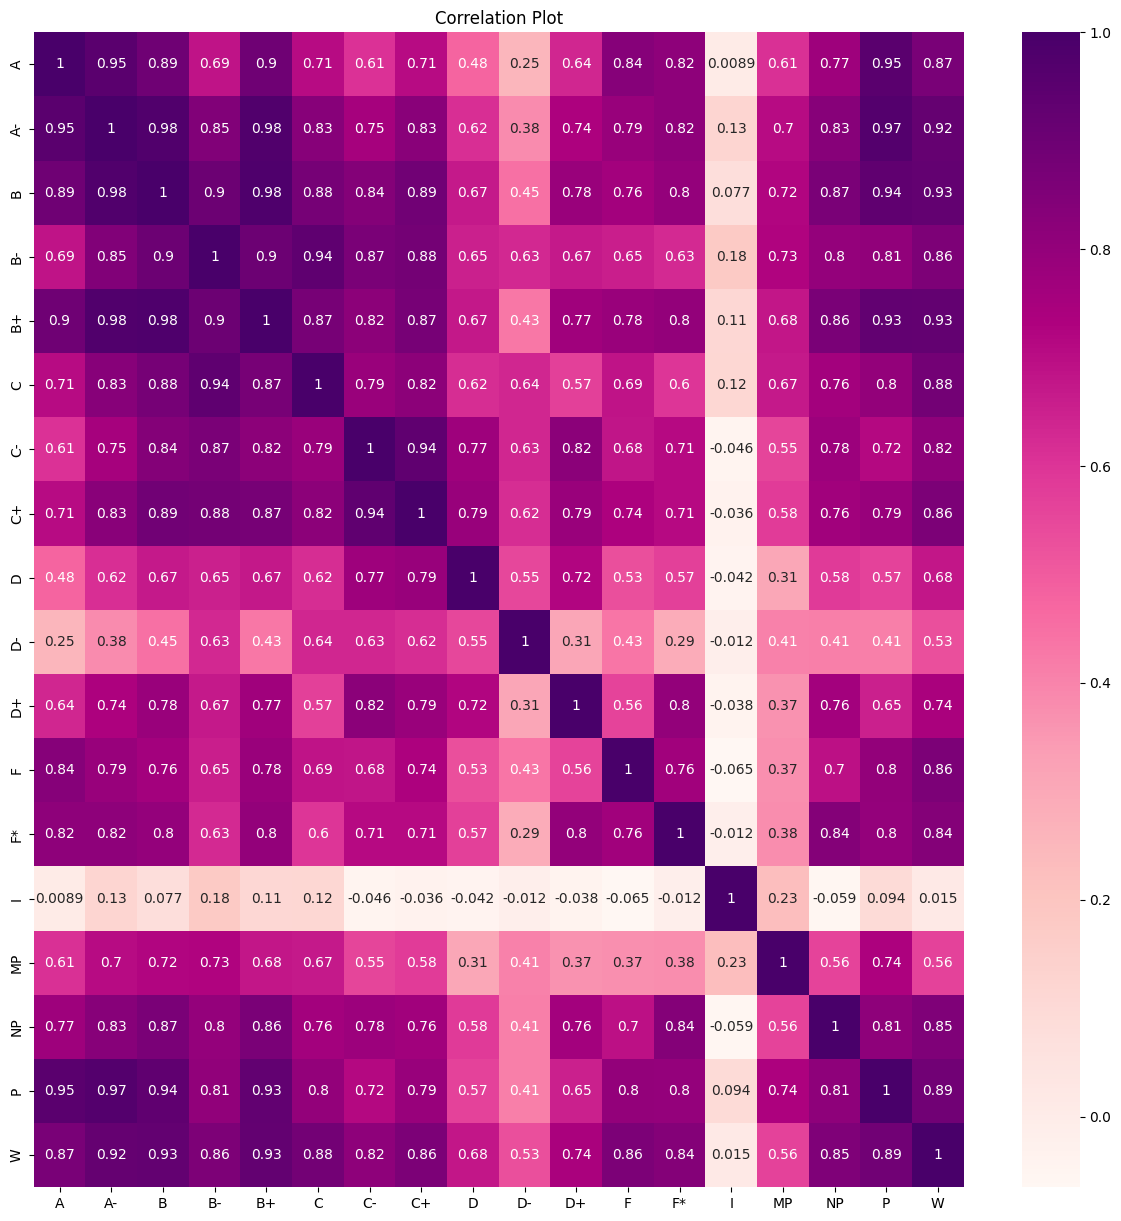

In [ ]:
#Undergraduate correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

#correlation plot
corr_matrix = Ugrad_Update1.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdPu')
plt.title('Correlation Plot')
plt.show()

**Grade Count Correlation**

* From the correlation plot, note that all the correlations are positive.

* 'I' counts do not correlate with any of the grade distributions.

* 'MP' counts have low to average correlation with the other grade counts.

* We will inspect grades with a correlation >= 0.90. Because we want to work with the columns that have a good correlation for when we decide to build a model that yields a good performance.

* These include:

  * W & A- | W & B | W & B+

  * P & A | P & A- | P & B | P & B+

  * C+ & C-

  * C- & C+

  * C & B-

  * B+ & A | B+ & A- | B+ & B | B+ & B- | B+ & P | B+ & W

  * B- & B | B- & B+ | B- & C

  * B & A- | B & B- | B & B+ | B & P | B & W

  * A- & A | A- & B | A- & B+ | A- & P | A- & W

  * A & A- | A & B+ | A & P
  
  * The grades/columns with good correlations are 'A', 'A-', 'B', 'B-', 'B+', 'C', 'C-', 'C+', 'P', and 'W'

> We will update the data frame to represent grades with corr >= 0.90.

In [ ]:
#Drop columns with correlation < 0.90.
UgradStrcorr =  Ugrad_Update1.drop(columns = ["I","D-","NP","MP","F*","F","D+","D-","D"])
UgradStrcorr.head()

,A,A-,B,B-,B+,C,C-,C+,P,W
0,284,75.0,38.0,21.0,58.0,13.0,2.0,3.0,28.0,14.0
1,82,25.0,14.0,5.0,10.0,1.0,1.0,3.0,15.0,1.0
2,80,29.0,8.0,4.0,18.0,1.0,1.0,2.0,1.0,4.0
3,175,32.0,17.0,4.0,16.0,1.0,0.0,5.0,4.0,0.0
4,762,225.0,109.0,51.0,135.0,15.0,17.0,27.0,175.0,31.0


> We will take a closer look at the grades with a correlation >= 0.90.

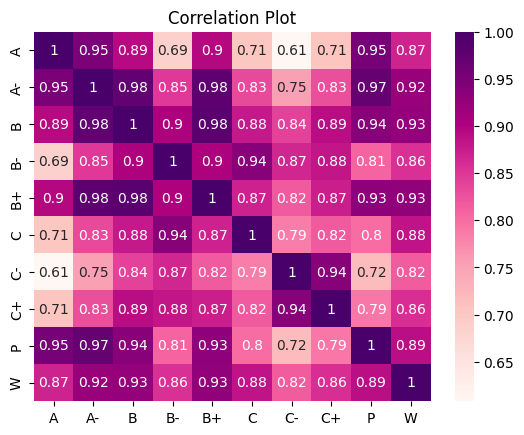

In [ ]:
# Correlation plot of grades with corr >= 0.90
import seaborn as sns
import matplotlib.pyplot as plt

#correlation plot
corr_matrix = UgradStrcorr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdPu')
plt.title('Correlation Plot')
plt.show()

* The rsults of the plot indicate that not all the upgraded columns have correation >= 0.90 : there is exisiting 0.61 lower correlations and this might affect the performance of the model we decide to build later on.

> So, we will reduce the columns to only the features with correlation >= 0.95.

> These include

  * P & A | P & A-

  * B+ & A- | B+ & B

  * B & A- | B & B+

  * A- & A | A- & B | A- & B+ | A- & P

  * A & A- | A & P
  
  * The grades/columns with stong correlations are: 'A', 'A-', 'B', 'B+' and 'P'.

> We will update the data frame to reflect the columns with strong correlations.

In [ ]:
#Update dataframe with grades that have correlation >= 0.95
UgradStrcorr =  UgradStrcorr.drop(columns = ["C+","C-","C","B-","W"])
UgradStrcorr.head()

,A,A-,B,B+,P
0,284,75.0,38.0,58.0,28.0
1,82,25.0,14.0,10.0,15.0
2,80,29.0,8.0,18.0,1.0
3,175,32.0,17.0,16.0,4.0
4,762,225.0,109.0,135.0,175.0


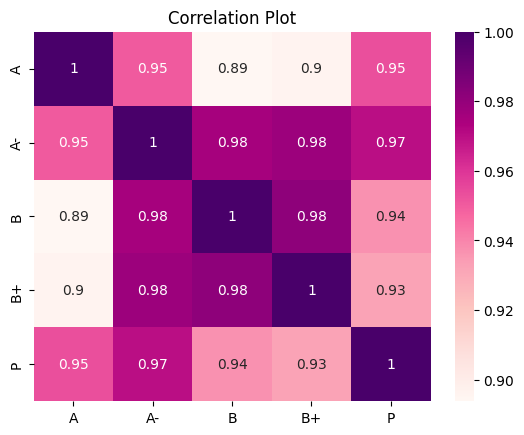

In [ ]:
#Correlation plot of grades with corr >= 0.95
import seaborn as sns
import matplotlib.pyplot as plt

#correlation plot
corr_matrix = UgradStrcorr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdPu')
plt.title('Correlation Plot')
plt.show()

> Note that with this updated version of the correlation plot, we are working with grades that have good and strong correlations with each other. They are the columns: 'A', 'A-', 'B', 'B+', and 'P'.

> We will explore the statistics of the selected features.

In [ ]:
#Summary statistics of the dataset
UgradStrcorr.describe()

,A,A-,B,B+,P
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,239.562842,64.349727,27.983607,35.918033,43.191257
std,348.768674,79.595599,34.895681,40.522533,68.294623
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,9.000000,4.000000,7.000000,4.000000
50%,112.000000,32.000000,14.000000,20.000000,12.000000
75%,230.000000,79.000000,39.000000,50.000000,54.000000
max,1707.000000,329.000000,155.000000,160.000000,309.000000


> The features have different ranges and varying mean values. So, they are in different ranges.

**Post Covid-19 Semesters: Graduate**

In [ ]:
#Dimensions of the datatset
Grad.shape

(154, 21)

> The dataset contains 154 rows and 21 columns.

In [ ]:
#View the first 5 rows of the dataset
Grad.head()

,GRAD,A,A-,B,B-,B+,C,C-,C+,D,...,D+,F,F*,I,MP,NP,P,W,(blank),Grand Total
0,ACCGU-MS,6.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,31
1,BIOGU-MED,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,15
2,CARTGU-MS,6.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,12
3,CRIMJGU-MS,11.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,24
4,EDEEGU-MED,26.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,2.0,NaN,NaN,8.0,4.0,53.0,96


> The 'GRAD' column specifies the Graduate program. We have no information about '(blank)' and 'Grand Total' computes a sum of the numerical values the program in the row.

> From the tabular view of the dataset, we can see that there are missing/ NaN values in the dataset.

In [ ]:
#Data types per attribute
Grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GRAD         154 non-null    object 
 1   A            148 non-null    float64
 2   A-           123 non-null    float64
 3   B            63 non-null     float64
 4   B-           58 non-null     float64
 5   B+           89 non-null     float64
 6   C            10 non-null     float64
 7   C-           12 non-null     float64
 8   C+           10 non-null     float64
 9   D            0 non-null      float64
 10  D-           0 non-null      float64
 11  D+           0 non-null      float64
 12  F            32 non-null     float64
 13  F*           17 non-null     float64
 14  I            6 non-null      float64
 15  MP           0 non-null      float64
 16  NP           0 non-null      float64
 17  P            105 non-null    float64
 18  W            33 non-null     float64
 19  (blank) 

> The 'GRAD' column is of type object, which specifies the Graduate level programs offered post Covid-19. All the columns with the grade counts are of type: float in addition to '(blank)'. 'Grand Total' is of integer type.

> Since, we have missing/NaN values in the dataset. We will check the columns with the missing/NaN values.

In [ ]:
#Check for columns with 'NaN' values
na_count = Grad.isna().sum()
print(na_count)

GRAD             0
A                6
A-              31
B               91
B-              96
B+              65
C              144
C-             142
C+             144
D              154
D-             154
D+             154
F              122
F*             137
I              148
MP             154
NP             154
P               49
W              121
(blank)         12
Grand Total      0
dtype: int64


> The grade count columns are the ones with the missing values.


> We will replace the missing/ Nan values with 0, since they are all numerical values - we will do this with the assumption that the lack of values in those entries means a grade count of 0.

In [ ]:
#Replcae the 'NaN' values with 0
Grad_Update = Grad.fillna(0)
Grad_Update.head()

,GRAD,A,A-,B,B-,B+,C,C-,C+,D,...,D+,F,F*,I,MP,NP,P,W,(blank),Grand Total
0,ACCGU-MS,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,31
1,BIOGU-MED,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,15
2,CARTGU-MS,6.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12
3,CRIMJGU-MS,11.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,24
4,EDEEGU-MED,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,8.0,4.0,53.0,96


> We will compute a count of the undergraduate programs offered during the post-Covid-19 semesters.

In [ ]:
#Calculate the count of each program
column_name = 'GRAD'
value_counts = Grad_Update[column_name].value_counts()

# Print the result
print("Occurrence of values in column '{}':".format(column_name))
print(value_counts)

Occurrence of values in column 'GRAD':
GRAD
CRIMJGU-MS    13
EDEEGU-MED    13
EDELGU-MED    13
ENGGU-MED     13
SPORGU-MED    13
HISTGU-MED    13
PSYBAGU-MS    12
CARTGU-MS     12
ENGLGU-MA     11
MATHGU-MED    11
ENGLGU-MAT    10
ACCGU-MS       6
WORLGU-MED     5
PSYIOGU-MS     4
BIOGU-MED      3
ARTGU-MED      1
THEAGU-MED     1
Name: count, dtype: int64


> The occurrence of the programs at the graduate level ranges between 13 to 1. Thus, based on the occurrence information of the graduate programs and the undergraduate programs, it is important to note that there is a difference in the enrollment of the students in the 4+1 programs.

> We will drop the 'GRAD', 'Grand Total', and '(blank)' columns because they do not provide information that we will use later and we will work with the numerical columns only for further exploration as they are the most relevant.

In [ ]:
# Drop 'GRAD','Grand Total', '(blank)' and work with the numerical values.
Grad_Update1 = Grad_Update.drop(columns =['GRAD','Grand Total', '(blank)'])
Grad_Update1.head()

,A,A-,B,B-,B+,C,C-,C+,D,D-,D+,F,F*,I,MP,NP,P,W
0,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,6.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,11.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,8.0,4.0


> We will further explore the numerical features: the grade counts.

In [ ]:
#Summary statstics of the numerical variables
Grad_Update1.describe()

,A,A-,B,B-,B+,C,C-,C+,D,D-,D+,F,F*,I,MP,NP,P,W
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0,154.0,154.0,154.000000,154.000000,154.000000,154.0,154.0,154.000000,154.000000
mean,18.623377,2.824675,0.766234,0.428571,1.194805,0.077922,0.090909,0.064935,0.0,0.0,0.0,0.493506,0.168831,0.051948,0.0,0.0,7.389610,0.519481
std,22.337307,3.089373,1.356621,0.592515,1.563798,0.313789,0.330649,0.247215,0.0,0.0,0.0,1.258938,0.545992,0.275164,0.0,0.0,11.040219,1.055461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,10.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000
75%,23.000000,3.750000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000
max,112.000000,21.000000,6.000000,2.000000,8.000000,2.000000,2.000000,1.000000,0.0,0.0,0.0,7.000000,3.000000,2.000000,0.0,0.0,52.000000,4.000000


> The columns are in different ranges and have varying means with great differences. Note: Dataset must be scaled/satndardized to have values in close range.

> We will check the correlation between the grade counts for the undergraduate programs. This will be helpful for our model as it will provide us with information about the grades/features with similar occurrences/counts for the model build.

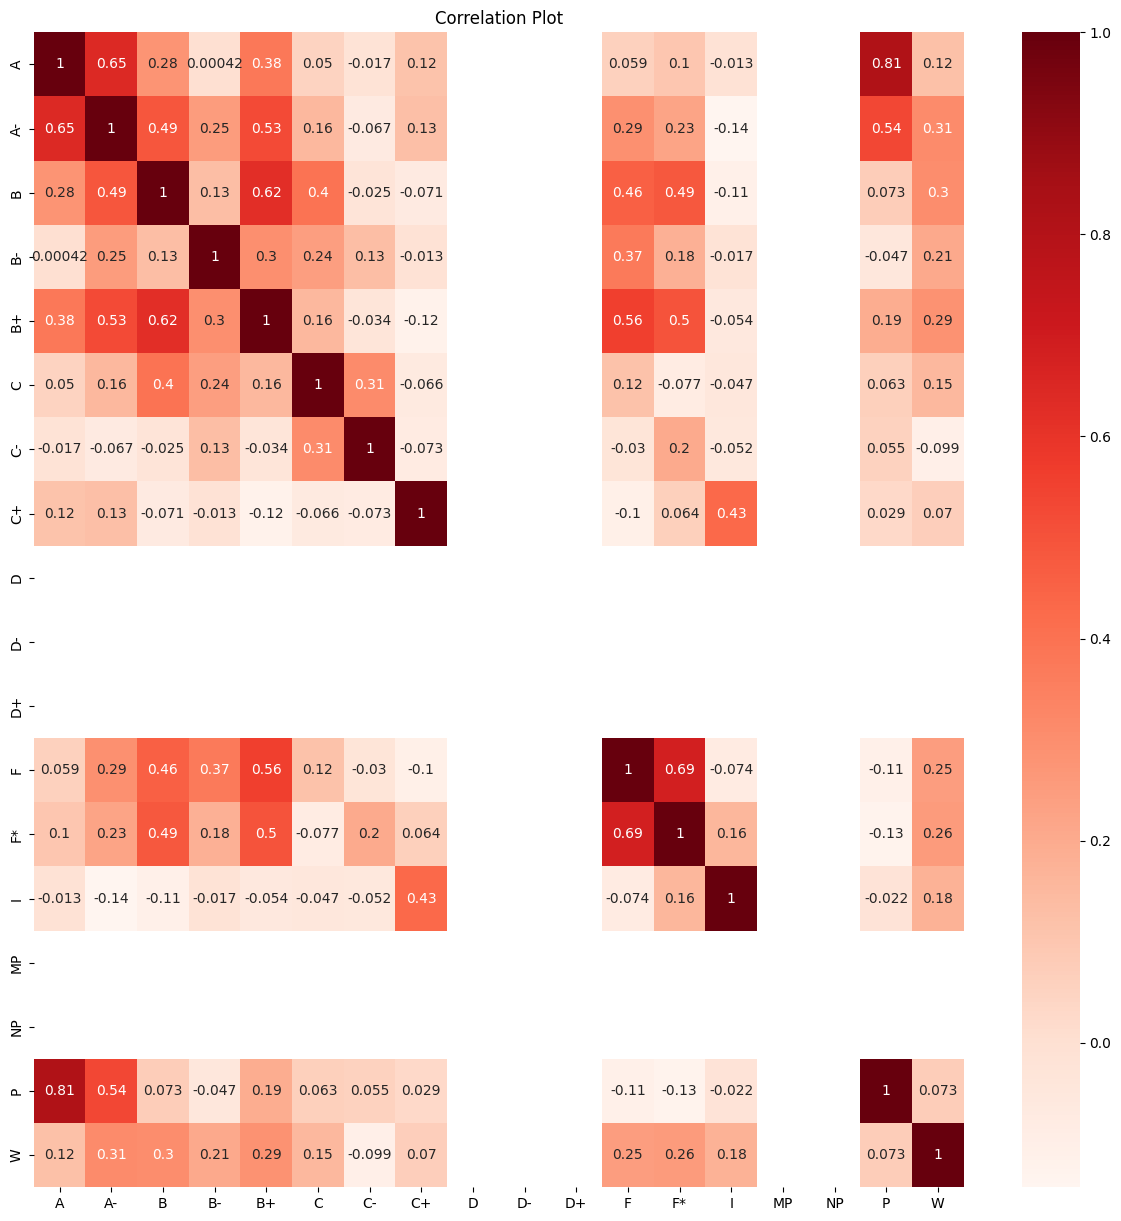

In [ ]:
#Graduate grade counts correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

#correlation plot
corr_matrix = Grad_Update1.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Reds')
plt.title('Correlation Plot')
plt.show()

> The features/variables with a good correlation that will provide information for the build of our model are 'A' & 'P'. They have a correlation of 0.81. Note: this indicates that the graduate programs expect high performance from all its students.

> The other grades/features do not correlate with the other grades: 'NP', 'MP', 'D+', 'D-', and 'D-' - Note: this could indicate that the graduate programs do not accommodate such grades, because of their low counts, so it could be that the graduate programs expect good performance from the students.

> The remaining grades have a low to medium correlation with the other grade counts.

> Update the dataframe to represent grades with with the identified strong correlation.

In [ ]:
#Update the dataframe to represent columns A & P only.
GradStrcorr =  Grad_Update1.drop(columns = ["I","D-","NP","MP","F*","F","D+","D-","D","W","C+","C-","C","B+","B-","B","A-"])
GradStrcorr.head()

,A,P
0,6.0,0.0
1,0.0,4.0
2,6.0,1.0
3,11.0,0.0
4,26.0,8.0


> View the correlation between 'A' & 'P'.

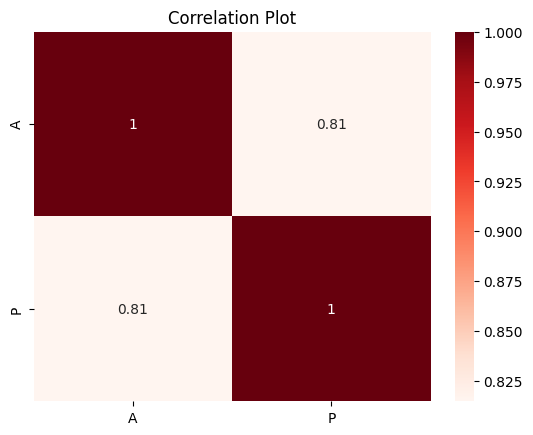

In [ ]:
#Correlation plot of 'A' and 'P'
import seaborn as sns
import matplotlib.pyplot as plt

#correlation plot
corr_matrix = GradStrcorr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Reds')
plt.title('Correlation Plot')
plt.show()

**Based on the information we have learned about the SSU 4+1 Grading System and the SSU 4+1 program operation. We have two questions that we will answer using the data:**

> **One we will answer through exploratory data analysis**

> **The other we will answer using a machine learning model**

# EDA Question
An advantage of 4+1 programs is a seamless transition from undergraduate-level courses to graduate-level courses of a program. How does seamless transisiton apply to the 4+1 programs at SSU based on the given dataset?

> We will compare undergraduate and graduate performance and look for consistency or improvement in the performance as the student progresses to higher level coursework.

> We will compute the grade count of each grade across the undergraduate programs. Since we are comparing the performance of the students, a count of the grades will provide us insight into the distribution of the grade counts.

> The distribution of the grade count is necessary to learn about the rise and fall in the performance as the student's progress to higher level courses.

In [ ]:
#Undergraduate Grade Count
Ugrad_totals = Ugrad_Update1.sum()
ugrad_sum = Ugrad_totals.sum()

print("Sum of the total of all grades:", ugrad_sum)
print(Ugrad_totals)

Sum of the total of all grades: 83325.0
A     43840.0
A-    11776.0
B      5121.0
B-     2467.0
B+     6573.0
C      1035.0
C-      531.0
C+     1150.0
D       196.0
D-       84.0
D+      114.0
F       334.0
F*      277.0
I       159.0
MP       82.0
NP      197.0
P      7904.0
W      1485.0
dtype: float64


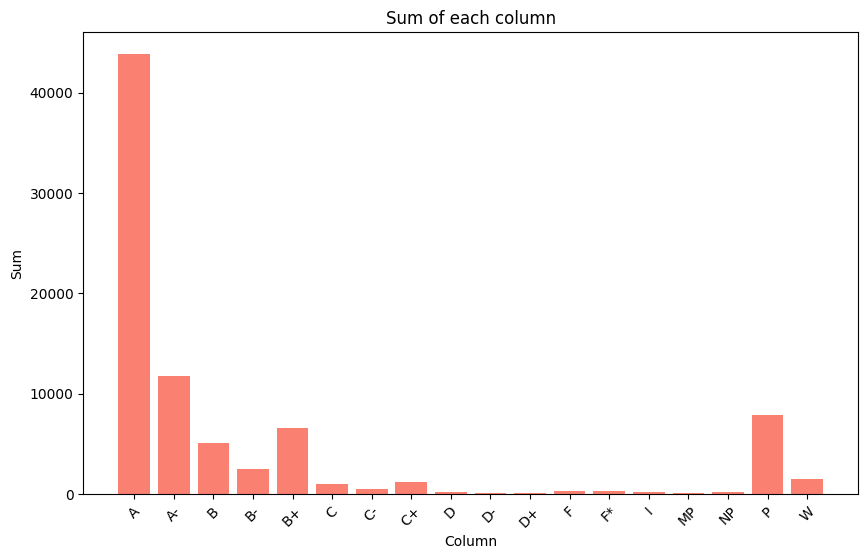

In [ ]:
#Visulaize the undergraduate grade count distribution
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Ugrad_totals.index, Ugrad_totals, color = 'salmon')
plt.title('Sum of each column')
plt.xlabel('Column')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.show()


> The bar plot provides us with a visual of the undergraduate grade distribution.

> There are more 'A'grades produced across the 4+1 programs. The 'A' grade counts more than double all other grade counts across the programs.

> The lowest produced grades at the undergraduate level are 'D-', 'D+', 'MP', 'NP', 'F', 'F*', and 'I'.

> The grade counts of 'P' and 'B+' fall under a close range.

> There is a good amount of 'A-' grades across all programs, as the count is the second highest of all other grade counts.

> The 'B' grade counts are approximately half of the 'A-' grade counts.


> We will compute the grade count of each grade across the graduate programs.

In [ ]:
#Graduate Grade Count
Grad_totals = Grad_Update1.sum()
grad_sum = Grad_totals.sum()

print("Sum of the total of all grades:", grad_sum)
print(Grad_totals)

Sum of the total of all grades: 5035.0
A     2868.0
A-     435.0
B      118.0
B-      66.0
B+     184.0
C       12.0
C-      14.0
C+      10.0
D        0.0
D-       0.0
D+       0.0
F       76.0
F*      26.0
I        8.0
MP       0.0
NP       0.0
P     1138.0
W       80.0
dtype: float64


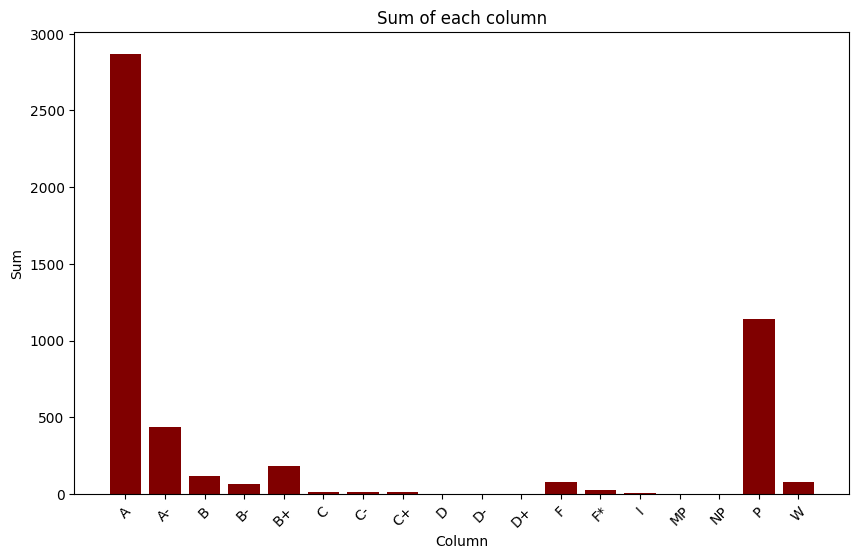

In [ ]:
#Visulaize the undergraduate grade count distribution
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Grad_totals.index, Grad_totals, color='maroon')
plt.title('Sum of each column')
plt.xlabel('Column')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.show()


> There 'A' grade counts is the highest of all grade counts and more than doubles all other grade counts at the graduate level.

> The second highest grade count is 'P'.

Info:


We will compare the grade distribution between the graduate and the undergraduate programs.

Note:

> From the EDA of the graduate and the undergraduate programs, there are differences in both the occurrence and the types of programs offered, so when we compare the graduate and undergraduate program grade distributions we will merge the dataframes from both programs using the information from the programs: 'UGRD' and 'GRAD' columns.

> Additonally, from the dimensions of the dataframes we saw that there is a difference in the size of the graduate and undergraduate programs data. Moreover, the total grade counts from both levels are different:

* Grad total grade count is 5035.0

* Undergraduate grade count total is 83325.0

Thus, to make an accurate comparison of both level grades, we will compute the percentages of the grades with respect to the total of each level.

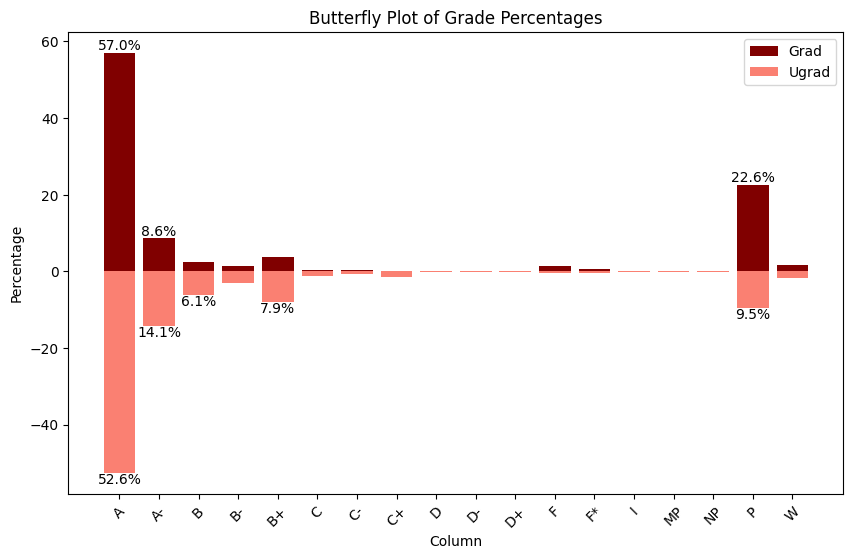

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentages for Grad DataFrame
grad_percentages = Grad_totals / grad_sum * 100

# Calculate percentages for Ugrad DataFrame
ugrad_percentages = Ugrad_totals / ugrad_sum * 100

# Plot the butterfly plot
plt.figure(figsize=(10, 6))

# Plot bars for Grad DataFrame
grad_bars = plt.bar(grad_percentages.index, grad_percentages, color='maroon', label='Grad')

# Plot bars for Ugrad DataFrame, with negative height to align bars
ugrad_bars = plt.bar(ugrad_percentages.index, -ugrad_percentages, color='salmon', label='Ugrad')

# Add labels and title
plt.title('Butterfly Plot of Grade Percentages')
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()

# Annotate bars with percentage values greater than 50%
for bar, height in zip(grad_bars, grad_percentages):
    if height > 5:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

for bar, height in zip(ugrad_bars, ugrad_percentages):
    if height > 5:
        plt.text(bar.get_x() + bar.get_width() / 2, -height, f'{height:.1f}%', ha='center', va='top')

# Show the plot
plt.show()

Information:

> 57.0% of the graduate level grades are 'A' and 52.6% of the undergraduate level grades are 'A'.

> 22.6% of graduate level grades are 'P' and 9.5% of undergraduate level grades are 'P'.

>

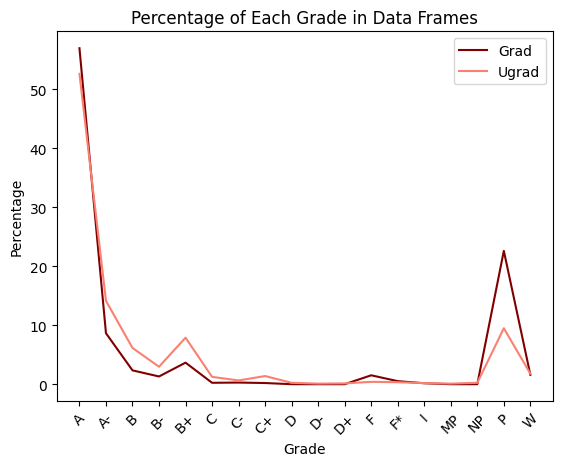

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentages for Grad DataFrame
grad_percentages = Grad_totals / grad_sum * 100

# Calculate percentages for Ugrad DataFrame
ugrad_percentages = Ugrad_totals / ugrad_sum * 100

# Plot line chart for Grad DataFrame
plt.plot(grad_percentages, label='Grad', color='maroon')

# Plot line chart for Ugrad DataFrame
plt.plot(ugrad_percentages, label='Ugrad', color='salmon')

# Set labels and title
plt.title('Percentage of Each Grade in Data Frames')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Information:

> From the line plot, both graduate and undergraduate level programs have high 'A' grade counts.

> For the graduate level programs:

  * There is a 0% count for 'C', 'C-', 'D', 'D+', 'I', 'MP', 'W', and 'NP' grades.

  * There is a rise in 'P' grade counts and less than 10% of the graduate-level grades are 'F'.

> For the undergraduate level programs:

  * There is a 0% count for 'D', 'D-', 'D+', 'F', 'F*', 'I', 'MP', 'W', and 'NP' grades.

**Conclusion**

> The 4+1 programs at SSU deliver a seamless transition to students as promised by the main advantages of 4+1 programs. All students who enroll in the 4+1 programs at SSU produce passing grades of either A or P.

> 79.6% of the students enrolled in the 4+1 programs post Covid-19 at SSU had grades of A or Pass across all the programs.

> The students enrolled in the 4+1 programs at SSU, have an academic strengthening from their undergraduate-level courses to their graduate-level courses. There is a 17.4% increase in the overall passing grades of the students who enroll in the 4+1 programs at SSU.


# Model Question

* As a student, it is important to know the passing rate of an institutions 4+1 program in order to decide whether or not to enroll in the 4+1 program. The information is helpful in determining the passing rate to asses the difficulty of the program in the institution.

* As a advisor / SSU administrative, it will be of great benefit and a time saving tool to have a quick access to a model that generates helpful information that provides students with information necessary to their decision mmaking for their college careers.

> * Thus, we will build a predictive model that will solve both the student's problem and help advisor's and SSU administratives with grade information about the 4+1 programs.

> Create a model to predict how well current undergraduate students will do with graduate level courses based on their grade distribution.



> We will change the column names of the graduate columns from the GradStrcorr data frame to 100 for 'A' and Pass for 'P', this will help us distinguish between the graduate and undergraduate grades/features.

In [ ]:
# Dictionary mapping old column names to new column names
column_mapping = {'A': '100', 'P': 'Pass'}

# Rename the columns of the DataFrame
GradStrcorr.rename(columns=column_mapping, inplace=True)
GradStrcorr.head()


,100,Pass
0,6.0,0.0
1,0.0,4.0
2,6.0,1.0
3,11.0,0.0
4,26.0,8.0


> Since we are building a predictive model: predict the graduate-level grade distribution of the programs based on the undergraduate-level grade distributions.

> We are to merge the data frames for both the undergraduate and graduate levels into one data frame. From the EDA we have established the feature-selected data frame for both levels. Based on the datasets, the graduate and undergraduate level programs share a common factor/feature, which is the 'Programs' column. So in order to make the dataframes into one, we will merge them using the programs column from their original datasets.

> We will add the 'GRAD' column to the data frame for the graduate features. This will help us merge the graduate and undergraduate dataframes.

In [ ]:
# Add the programs column to Correlated Columns dataframe
GradStrcorr['Programs'] = Grad_Update['GRAD']

GradStrcorr.head()

,100,Pass,Programs
0,6.0,0.0,ACCGU-MS
1,0.0,4.0,BIOGU-MED
2,6.0,1.0,CARTGU-MS
3,11.0,0.0,CRIMJGU-MS
4,26.0,8.0,EDEEGU-MED


> We will add the 'UGRD' column to the dataframe for the undergraduate features. This will help us merge the graduate and undergraduate dataframes.

In [ ]:
# Add the programs column to Correlated Columns dataframe
UgradStrcorr['Programs'] = Ugrad_Update['UGRD']

UgradStrcorr.head()

,A,A-,B,B+,P,Programs
0,284,75.0,38.0,58.0,28.0,ACCGU-BSBA
1,82,25.0,14.0,10.0,15.0,BIOGU-BS
2,80,29.0,8.0,18.0,1.0,CARTGU-BS
3,175,32.0,17.0,16.0,4.0,CRIMJGU-BS
4,762,225.0,109.0,135.0,175.0,EDEEGU-BS


> From the count of the undergraduate level programs and graduate level programs, there is difference in the programs that exist in both levels: Some programs that exist in the graduate level are not included in the undergraduate level programs.

> Note: The programs are specified as acronyms followed by - and BS for undergrad and MS / other specifications for the graduate programs.
Thus, we can merge the two dataframes into one by using the Programs information for both levels from the information before the '-' of the programs.

In [ ]:
# Update the 'Programs' column in the Ugrad dataframe
UgradStrcorr['Programs'] = UgradStrcorr['Programs'].apply(lambda x: x.split('-')[0])

# Update the 'Programs' column in the Grad dataframe
GradStrcorr['Programs'] = GradStrcorr['Programs'].apply(lambda x: x.split('-')[0])

# Merge the two dataframes based on the updated 'Programs' column
merged_df = pd.merge(UgradStrcorr, GradStrcorr, on='Programs', how='inner')

# Create a new dataframe using the filtered rows
questModeldf = merged_df[['Programs', 'A', 'A-', 'B', 'B+', 'P', '100', 'Pass']]

# Print the new dataframe
questModeldf.head()

,Programs,A,A-,B,B+,P,100,Pass
0,ACCGU,284,75.0,38.0,58.0,28.0,6.0,0.0
1,ACCGU,284,75.0,38.0,58.0,28.0,24.0,0.0
2,ACCGU,284,75.0,38.0,58.0,28.0,20.0,0.0
3,ACCGU,284,75.0,38.0,58.0,28.0,6.0,0.0
4,ACCGU,284,75.0,38.0,58.0,28.0,17.0,0.0


> In the merged data frame, we have all the selected features fro both data frames that produce the highest correlations between the grades.

> Explore the Model-Question dataframe.

In [ ]:
# Dimensions of the dataframe
questModeldf.shape

(1693, 8)

> There are 1693 rows and 8 columns.

> We will identify the programs that continuous in the undergraduate and graduate level, as they are continuous and are the programs that makeup the 4+1 programs at SSU.

In [ ]:
#Calculate the count of each program
column_name = 'Programs'
value_counts = questModeldf[column_name].value_counts()

# Print the result
print("Occurrence of values in column '{}':".format(column_name))
print(value_counts)

Occurrence of values in column 'Programs':
Programs
ENGLGU     273
CRIMJGU    169
EDEEGU     169
EDELGU     169
ENGGU      169
HISTGU     169
CARTGU     156
PSYBAGU    156
MATHGU     143
ACCGU       78
BIOGU       39
ARTGU        3
Name: count, dtype: int64


> The following programs have grade counts from undergraduate level courses to graduate level courses: ENGLGU, CRIMJGU, EDEEGU, EDELGU, ENGGU, HISTGU, CARTGU, PSYBAGU, MATHGU, ACCGU, BIOGU, ARTGU. These are the only programs where students enrolled in the 4+1 program at SSU.

> We will drop the 'Programs' column since it will not be used in building the model: We are using the undergrad grades to predict the graduate level Passing rate.

In [ ]:
#Drop 'Programs' column
questModeldf1 = questModeldf.drop(columns =['Programs'])
questModeldf1.head()

,A,A-,B,B+,P,100,Pass
0,284,75.0,38.0,58.0,28.0,6.0,0.0
1,284,75.0,38.0,58.0,28.0,24.0,0.0
2,284,75.0,38.0,58.0,28.0,20.0,0.0
3,284,75.0,38.0,58.0,28.0,6.0,0.0
4,284,75.0,38.0,58.0,28.0,17.0,0.0


> Explore the statistics of the features.

In [ ]:
#Summay statistics of Dataset
questModeldf1.describe()

,A,A-,B,B+,P,100,Pass
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,298.878913,76.781453,32.093325,41.709392,51.073833,20.272888,7.864737
std,393.856526,88.691450,38.989673,44.553226,77.534351,23.727720,11.734152
min,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,16.000000,6.000000,10.000000,2.000000,5.000000,0.000000
50%,123.000000,37.000000,14.000000,24.000000,15.000000,10.000000,3.000000
75%,326.000000,131.000000,48.000000,60.000000,59.000000,24.000000,8.000000
max,1707.000000,329.000000,155.000000,160.000000,309.000000,112.000000,52.000000


> The columns are in different ranges and have varying means with great differences. Note: The dataset must be scaled/standardized to have values in close range and ensure faster convergence during training.

> We will standardize the model's data frame to have our values in the same range, this will make the correlation coefficients more reliable and interpretable.


In [ ]:
#Normalize numerical features
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to your dataset
scaler.fit(questModeldf1)

# Transform the dataset using the scaler
questModeldf1_standardized = scaler.transform(questModeldf1)

# Convert the standardized data back to a DataFrame
questModeldf1_standardized = pd.DataFrame(questModeldf1_standardized, columns=questModeldf1.columns)

> We will visualize the correlation of the undergraduate features to the target graduate features using a heatmap.

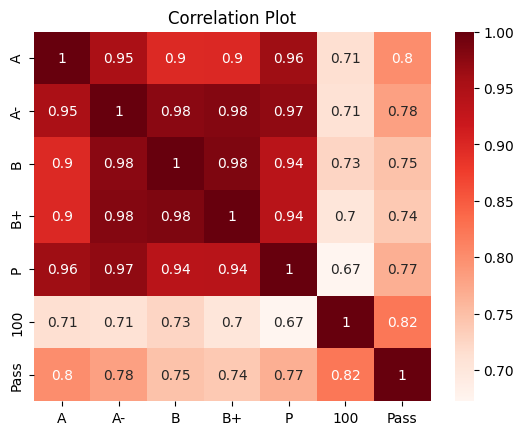

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation plot
corr_matrix = questModeldf1_standardized.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Plot')
plt.show()

> The features have good correlations with the target variables '100' and 'Pass': the lowest correlation is 0.74 for the 'Pass' target and 0.67 for the '100' target.

> The input/dependent features from the undergraduate-level grades have the highest correlation as compared to their correlation with the target features: '100' and 'Pass'.


**Build Model**

> Our dataset has dimensions (1693, 7).

> This is a supervised learning question because we are using the undergraduate grade level grades to predict the graduate level grades. Moreover, the target features are continuous values '100' and 'Pass' represent grade counts for the graduate level courses, thus we will build a regression model.

> We will build the model using Multiple Layer Perceptron.  
 > * The patterns in the data are not very simple or linear, so using an MLP with stacked perceptrons will help our model learn the patterns in the data. Moreover, because MLP uses backpropagation techniques during training, this will help optimize the model's performance in learning the data patterns and yield low error rates.

 > * Based on the correlation plot from the heatmap above, there is a high multicollinearity between the input/target features. This multicolineraity can cause overfitting during training and reduce the performance of the model when introduced with testing data. Thus, when building the model we will account for this as we plan the architecture of the model.

 > * From the correlation plot, the correlation between the input features and the target features is between 0.67 and 0.77, these values are more than average for establishing a good correlation between features. This MLP would help account for the average correlation between the input features and the target features: by reducing the prediction error and adjusting the weights as needed for a high-performing model.

In [ ]:
#Import necessary classes
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor

In [ ]:
# Split the dataset into training and testing sets
X = questModeldf1_standardized[['A','A-','B','B+','P']]
y = questModeldf1_standardized[['100','Pass']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MLP Architecture

* Number of input neurons = 5: one per input feature/ undergraduate grade

* Number of hidden layers = 2

* Number  of neurons per layer = 5

* Number of output neurons = 2: one per target feature/ graduate grade

* Hidden activation = ReLU

* Output activation = ReLU

* Loss Function = MSE and MAE

> For the model parameters we will make the following adjustments

> * solver = sgd - Stochastic Gradient Descent: because it converges faster and updates the model's parameters after each training example. This is helpful for the build of the MLP model because we are working with input features that have high multicollinearity and medium correlations with the target features.

> * learning_rate_init = 0.01 (arrived here through trial and error)

In [ ]:
# Build the MLP model
model = MLPRegressor(hidden_layer_sizes=(5,5), activation='relu', solver='sgd', alpha=0.0001,
                     batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                     power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001,
                     verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                     early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                     epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [ ]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor(hidden_layer_sizes=(5, 5), learning_rate='adaptive',
             learning_rate_init=0.01, solver='sgd')

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

**Model Evaluation**

> We will evaluate the performance of the model using the error rate using

  * MAE: calculated as the average of the absolute error values between the model-predicted values and the actual values.

  * MSE: an important loss function for the algorithms fit using least-squares [the mean squared error between the predictions and expected values] framing for a regression problem.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("Mean Absolute Error on Test Set:", mae)

**Model Error Evaluation**

> The model performance has a Mean Squared Error value of 0.286 squared units unrounded. This indicates that 0.714 out of 1.0 predictions made by the model exactly matched the expected values.

> The model performance has a Mean Absolute Error value of 0.358 squared units unrounded. This indicates that 0.642 out of 1.0 of the predictions made by the model exactly matched the expected values.

> We will visualize the error between the predicted values and the observed values using a residual plot.

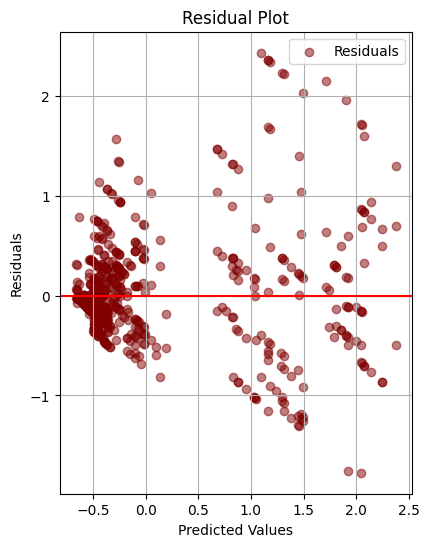

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5, color='Maroon', label='Residuals')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.grid(True)

**Model Residual Evaluation**

> Observations from the plot:

> * The residuals are randomly scattered around the horizontal axis.

> * Most of the points are close to the origin and fewer amount of the points are farther away from the origin: majority of the points fall between -1 to 1.

> * The data points have a symmetry about the origin (0,0).

> * There are slightly more data points on the positive end than on the negative end: though there is a larger spread of data points across the positive end than the negative end.

> * There are outliers on both ends of the origin:  on the positive end and negative end.

> * The spread of the residuals is relatively consistent across the range of predicted values, this suggests that the model's prediction has consistent variability across different levels of the the target attribute.

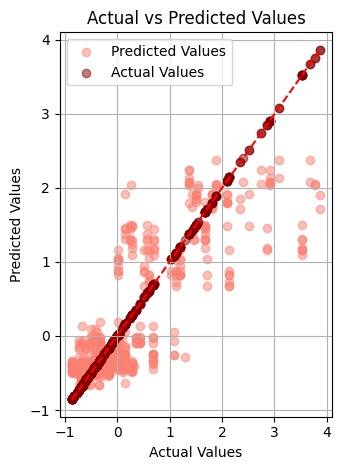

In [ ]:
# Plot the scatterplot for actual vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='salmon', alpha=0.5, label='Predicted Values')
plt.scatter(y_test, y_test, color='maroon', alpha=0.5, label='Actual Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test.values.min(), y_pred.min()), max(y_test.values.max(), y_pred.max())],
         [min(y_test.values.min(), y_pred.min()), max(y_test.values.max(), y_pred.max())],
         color='red', linestyle='--')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Model Scatter Plot Evaluation**

> Observations from the plot:

> * Majority of the model's predicted values are all close to the plot, with a few sparsed points which may be considered as the outliers on the data.

> * There is a tight clustering of the points around the lower left corner of the diagonal, indicating that the model's predictions are consistent across different levels of the actual values.

> * The residuals are evenly distributed across the top and bottom of the diagonal line, thus indicating that the model's predictions are unbiased and have minimal systematic errors.




**Conclusion**

> The MLP model is a good predicting model with a very low error rate, MSE =  0.286 and MAE = 0.358.  Additionally, based on the residual plot and the scatter plot above, the model produced reliable patterns that match the behiour of a well-performing model.

**Uses of the MLP Model**

 The model could be used for the following tasks by Salem State University:

 * A professor or Salem State academic administrative could use the model to
 predict the performance of the current Juniors/Seniors to evaluate their projected passing rate when they enroll in the 4+1 programs.

 * Moreover, a professor, SSU administrative, and students aspiring to enroll in the 4+1 programs at SSU can use the model to predict graduate-level grades to enhance and make adjustments to teaching styles in the case that the predictions do not yield a high-performance rate at the graduate level.

In [ ]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
librsvg2-bin is already the newest version (2.52.5+dfsg-3ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>